In [60]:
#importing all the required lib
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [61]:
#uploaded the dataset i.e. loan.csv

In [62]:
#read the dataset
df=pd.read_csv(r"//Users//ppal02//Documents//Personal//AL_ML/EDA//Case Study 1//loan.csv")

In [63]:
#check the first 5 rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [64]:
#checking the shape of dataset
df.shape

(39717, 111)

In [65]:
#clearly 111 columns, which is huge data columns to data analysis.
#The target variable, which we want to compare across the independent variables, is loan status. 
#The strategy is to figure out compare the defaulters across various independent variables and identify the ones that affect the most.


# Data Cleanup Process


In [66]:
#first find missing value check
#percentage of missing values in each column
100*df.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [67]:
# removing the columns having more than 60% missing values
null_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 60]
print(null_columns)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [68]:
len(null_columns)

57

In [69]:
#approx 57 columns has approx 60% missing or null values which might make our analysis inaccurate, 
#so let's drop those columns from dataframe.

df=df.drop(null_columns,axis=1)

In [70]:
#let's check the shape and head again
df.shape

(39717, 54)

In [71]:
#Lets get rid of column which are not required
extra_cols=["id",
"member_id",
"emp_title",
"url",
"zip_code",
"delinq_2yrs",
"earliest_cr_line",
"inq_last_6mths",
"pub_rec",
"initial_list_status",
"revol_util",
"out_prncp_inv",
"total_pymnt_inv",
"total_rec_prncp",
"total_rec_int",
"total_rec_late_fee",
"recoveries",
"collection_recovery_fee",
"last_pymnt_d",
"last_pymnt_amnt",
"last_credit_pull_d",
"collections_12_mths_ex_med",
"policy_code",
"acc_now_delinq",
"chargeoff_within_12_mths",
"delinq_amnt",
"application_type",
"pymnt_plan",
"desc",
"tax_liens",
"title",
"out_prncp"]

In [72]:
#dropping the extra columns
df=df.drop(extra_cols,axis=1)

In [73]:
df.shape

(39717, 22)

In [74]:
#check the loan status possible values
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [75]:
#Let's drop the records which are currently in process because it won't help in eith Fully paid counts or defaulter count.

loan_status_list = ['Fully Paid','Charged Off']
df=df[df['loan_status'].isin(loan_status_list)]
df.shape

(38577, 22)

In [76]:
#convert loan status data into numerical data i.e. Fully Paid = 0 and Charged Off = 1
df['loan_status']=df['loan_status'].map({'Fully Paid':0,'Charged Off':1})


In [77]:
#converting int_rate from string to float
df['int_rate']=df['int_rate'].str.replace('%','')
df['int_rate']=df['int_rate'].astype(float)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  int64  
 14  purpose               38577 non-null  object 
 15  addr_state         

# Data Analysis

## Univariate Analysis

In [79]:
##let define columns into catagory and numerical columns
cat_cols=["loan_status","grade","term","emp_length","verification_status","home_ownership","sub_grade","emp_length","purpose","open_acc","pub_rec_bankruptcies"]
cont_cols=["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti","revol_bal","total_acc","total_pymnt"]


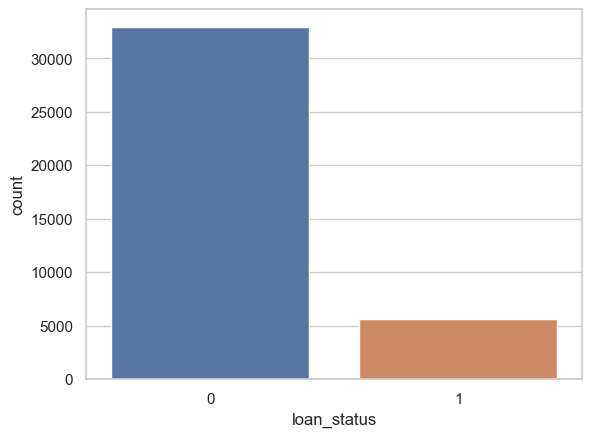

<Figure size 15000x3000 with 0 Axes>

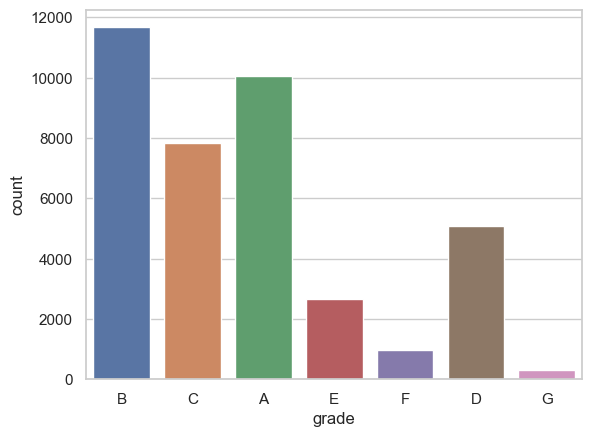

<Figure size 15000x3000 with 0 Axes>

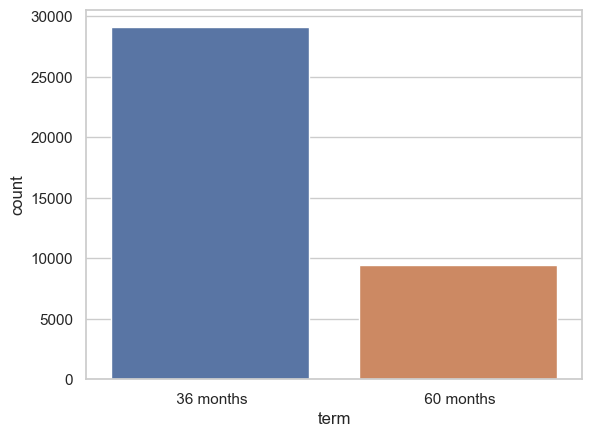

<Figure size 15000x3000 with 0 Axes>

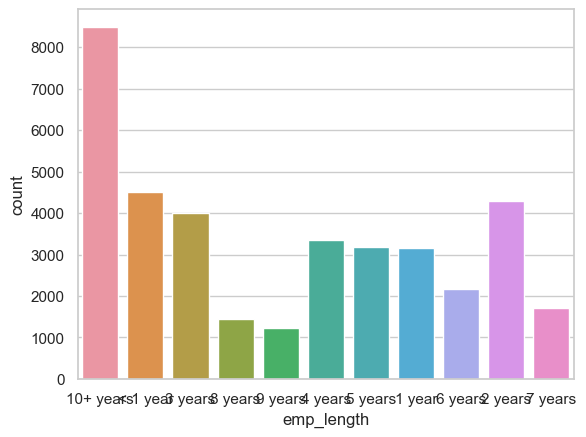

<Figure size 15000x3000 with 0 Axes>

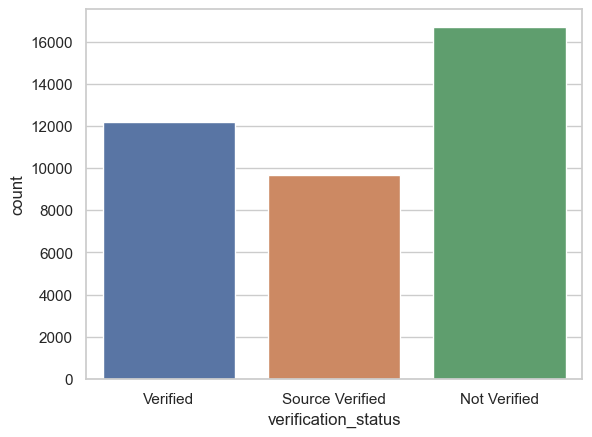

<Figure size 15000x3000 with 0 Axes>

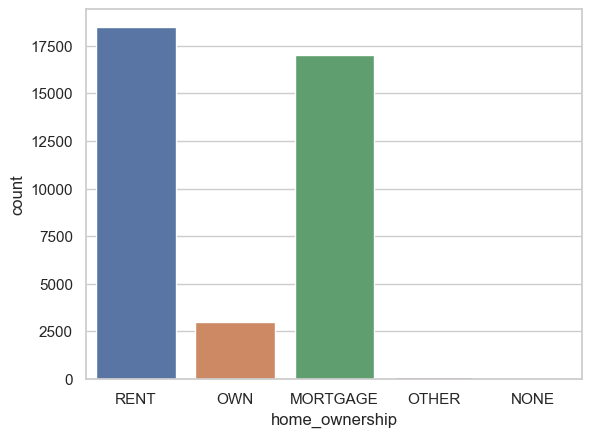

<Figure size 15000x3000 with 0 Axes>

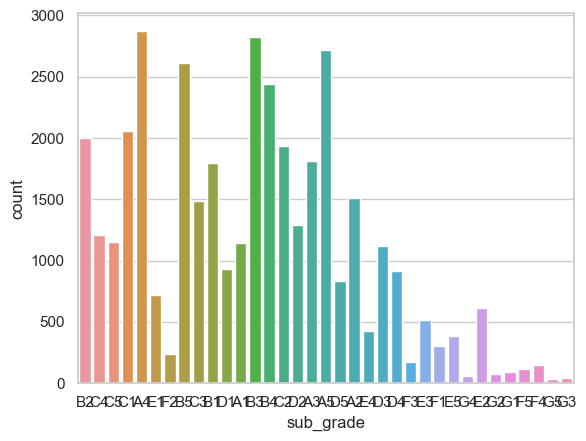

<Figure size 15000x3000 with 0 Axes>

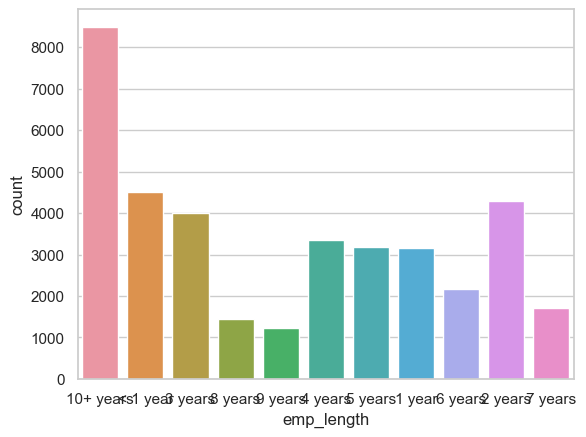

<Figure size 15000x3000 with 0 Axes>

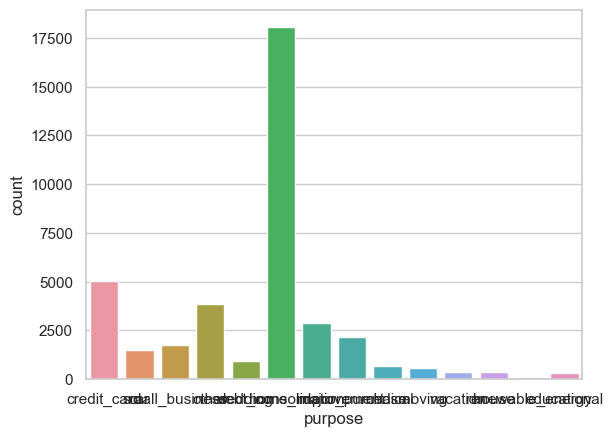

<Figure size 15000x3000 with 0 Axes>

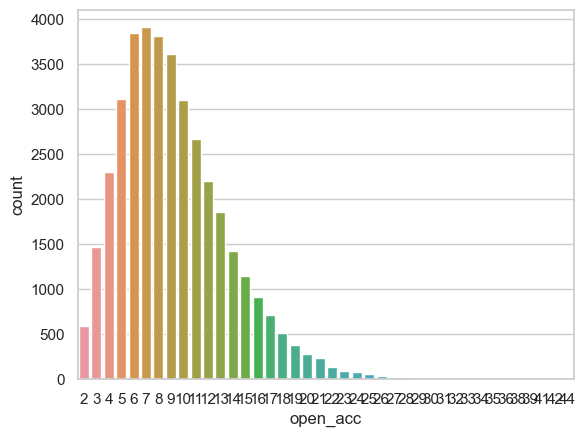

<Figure size 15000x3000 with 0 Axes>

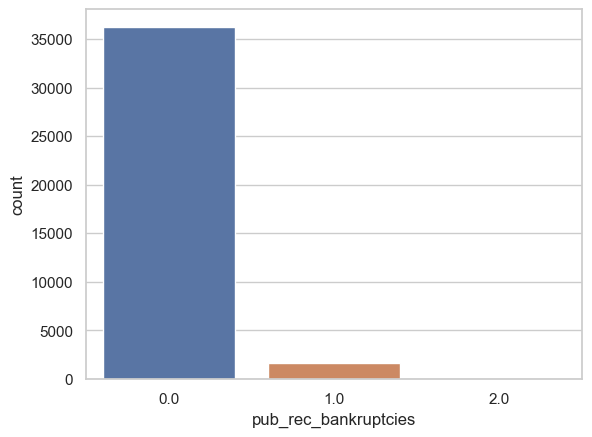

<Figure size 15000x3000 with 0 Axes>

In [22]:
##Do the univariate analysis of all the categorical columns and get the counts of each column
sns.set(style="whitegrid")
for col in cat_cols:
    sns.countplot(x=df[col])
    plt.figure(figsize=(150,30))
    plt.show()

## Bivariate Analysis - Categorical Vs Categorical

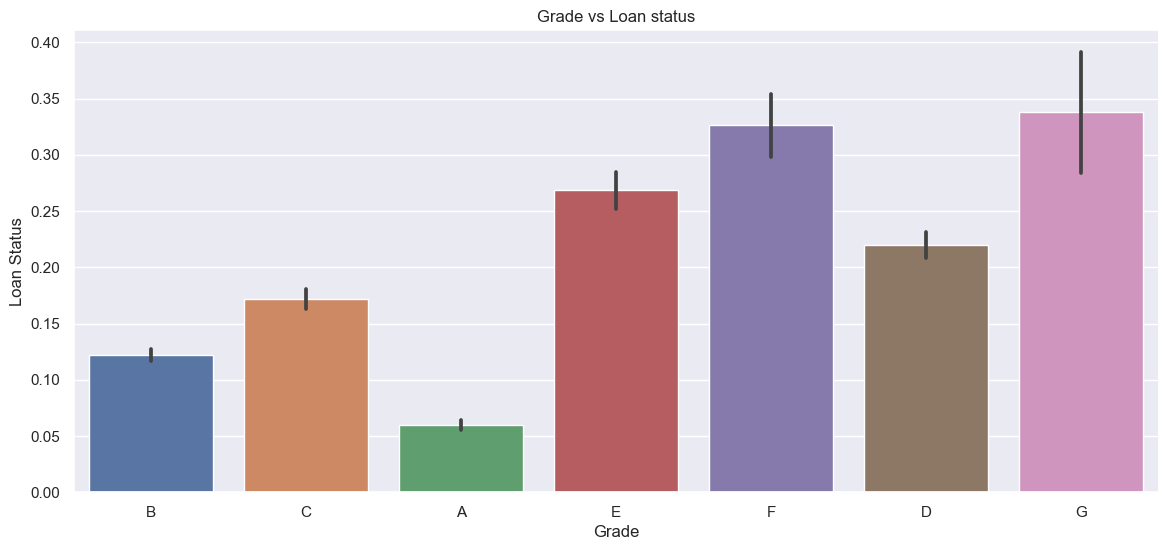

In [80]:
##grade : Compare grade vs loan_status to get the defaulters
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.barplot(x=df["grade"],y=df["loan_status"])
plt.title('Grade vs Loan status')
plt.xlabel('Grade')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion: We can clearly see that people from grade F and G are mostly defaulters

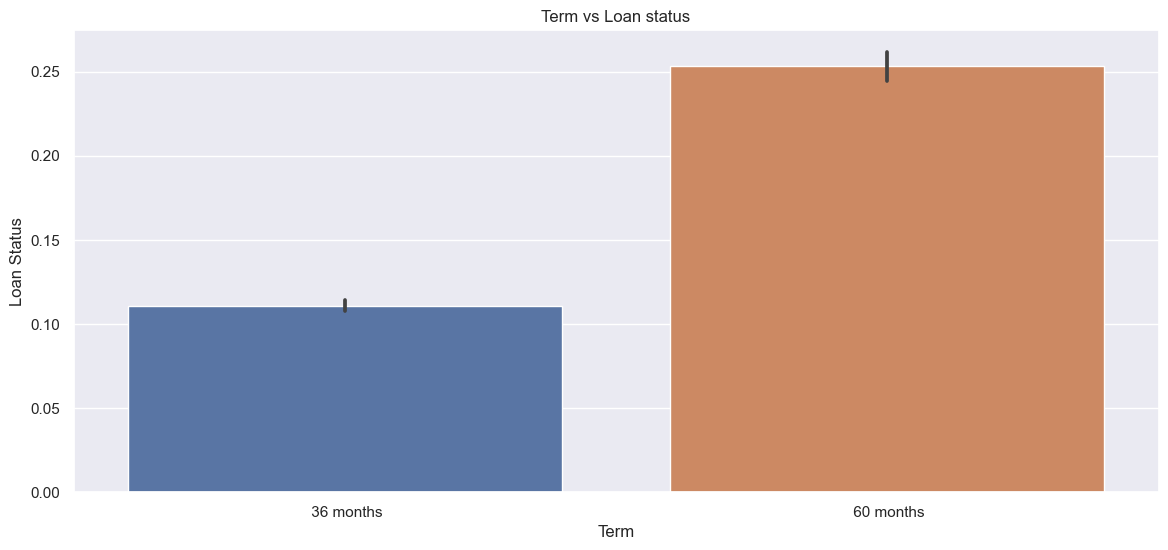

In [85]:
##term : Compare term vs loan_status to get the defaulters
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.barplot(x=df["term"],y=df["loan_status"])
plt.title('Term vs Loan status')
plt.xlabel('Term')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion: we can see that with the term of 60 months, people are mostly parched off

In [86]:
##Lets try to fetch emp_length in numeric format
#first check the null values for emp_length
df['emp_length'].isna().sum()

1033

In [87]:
##Lets discard null records
df = df[~df['emp_length'].isnull()]

In [88]:
df['emp_length'].isna().sum()

0

In [89]:
##now convert the column from String to Numeric
##using regular expression to extract numeric values from the string
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

#convert to numeric
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

In [90]:
#let's check the column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   funded_amnt           37544 non-null  int64  
 2   funded_amnt_inv       37544 non-null  float64
 3   term                  37544 non-null  object 
 4   int_rate              37544 non-null  float64
 5   installment           37544 non-null  float64
 6   grade                 37544 non-null  object 
 7   sub_grade             37544 non-null  object 
 8   emp_length            37544 non-null  int64  
 9   home_ownership        37544 non-null  object 
 10  annual_inc            37544 non-null  float64
 11  verification_status   37544 non-null  object 
 12  issue_d               37544 non-null  object 
 13  loan_status           37544 non-null  int64  
 14  purpose               37544 non-null  object 
 15  addr_state         

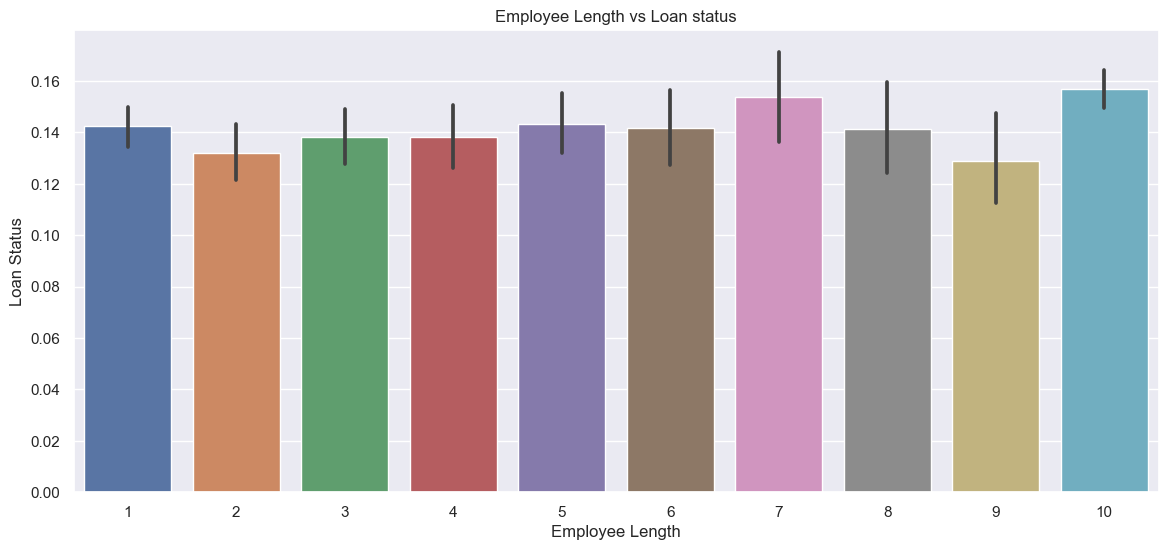

In [91]:
##lets check the graph again between loan_status and emp_length
##emp_length : Compare emp_length vs loan_status to get the defaulters
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.barplot(x=df["emp_length"],y=df["loan_status"])
plt.title('Employee Length vs Loan status')
plt.xlabel('Employee Length')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion: We can clearly see that no such significant discriminator

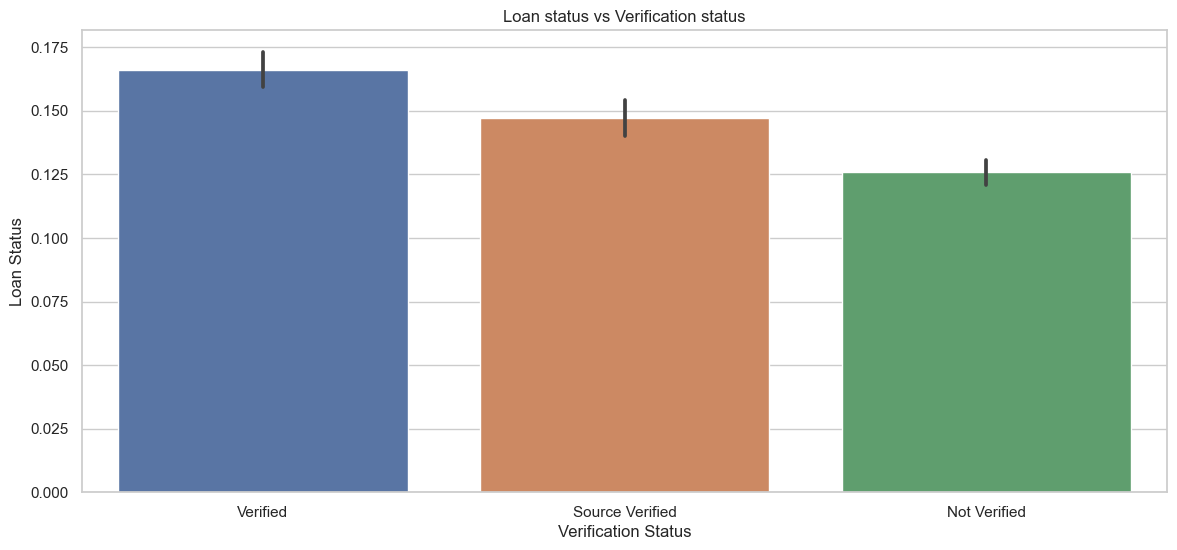

In [92]:
##lets check the graph again between loan_status and verification_status
##verification_status : Compare verification_status vs loan_status to get the defaulters
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.barplot(x=df["verification_status"],y=df["loan_status"])
plt.title('Loan status vs Verification status')
plt.xlabel('Verification Status')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion: looks like verified loans are defaulted more than others

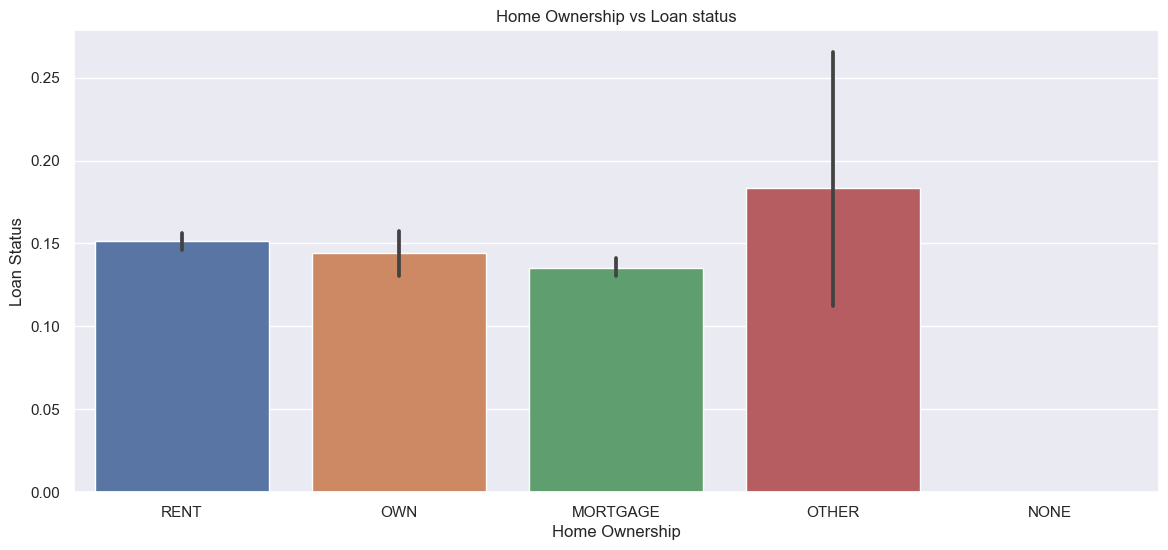

In [93]:
##lets check the graph again between home_ownership and loan_status
##home_ownership : Compare home_ownership vs loan_status to get the defaulters
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.barplot(x=df["home_ownership"],y=df["loan_status"])
plt.title('Home Ownership vs Loan status')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion: People with Home Ownership as "others" parched-off more followed by "Rent" and "Owner"

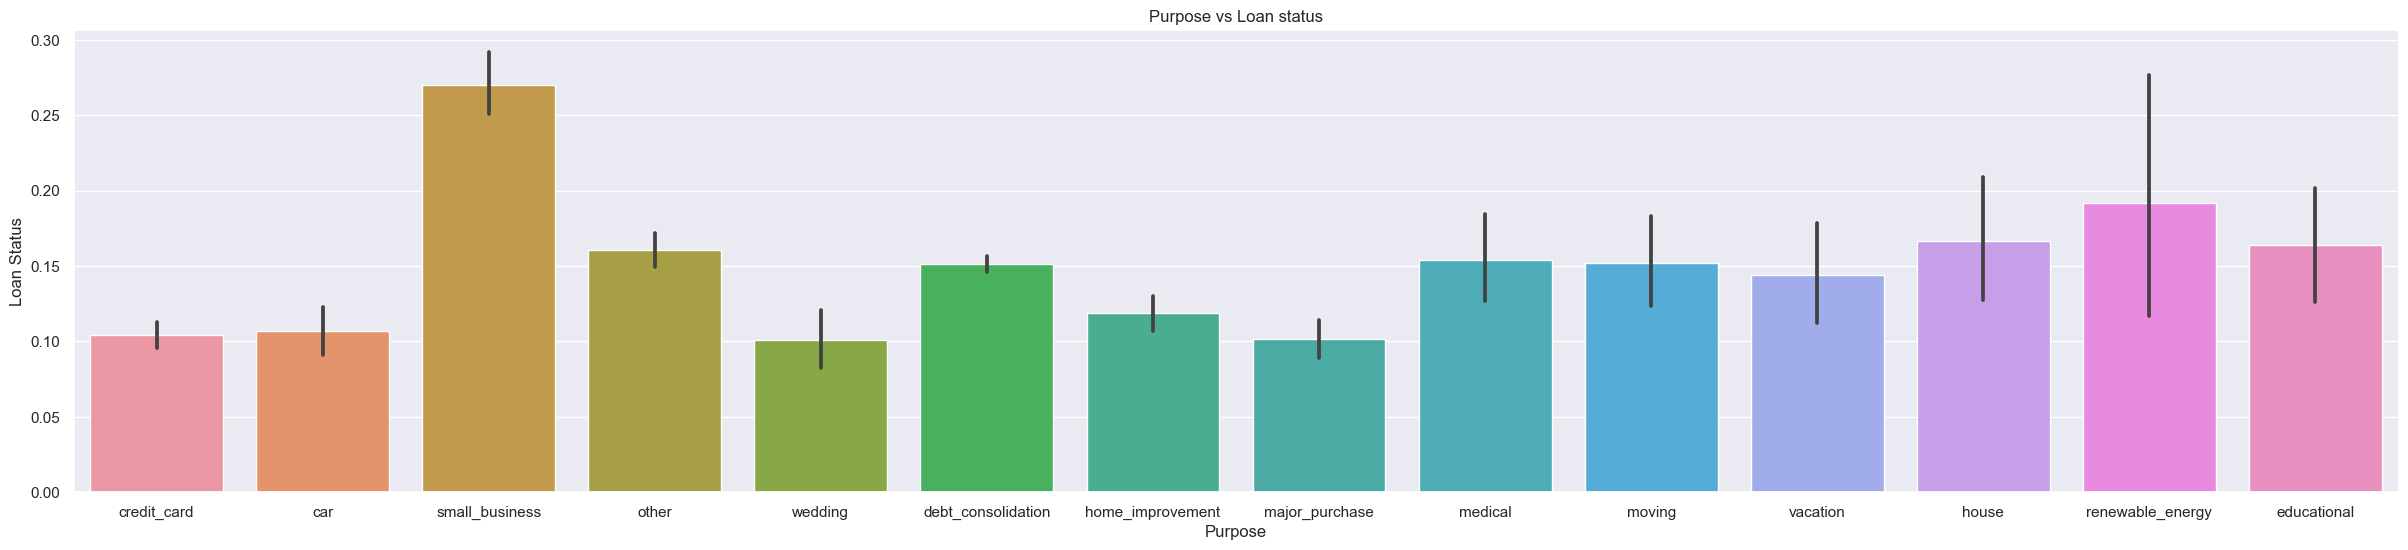

In [94]:
##lets check the graph again between purpose and loan_status
##purpose : Compare purpose vs loan_status to get the defaulters
plt.figure(figsize=(30, 6))
sns.set(style="darkgrid")
sns.barplot(x=df["purpose"],y=df["loan_status"])
plt.title('Purpose vs Loan status')
plt.xlabel('Purpose')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion: clearly people who take loan for small business purpose, defaulted more followed by renuewable energy and educational loans

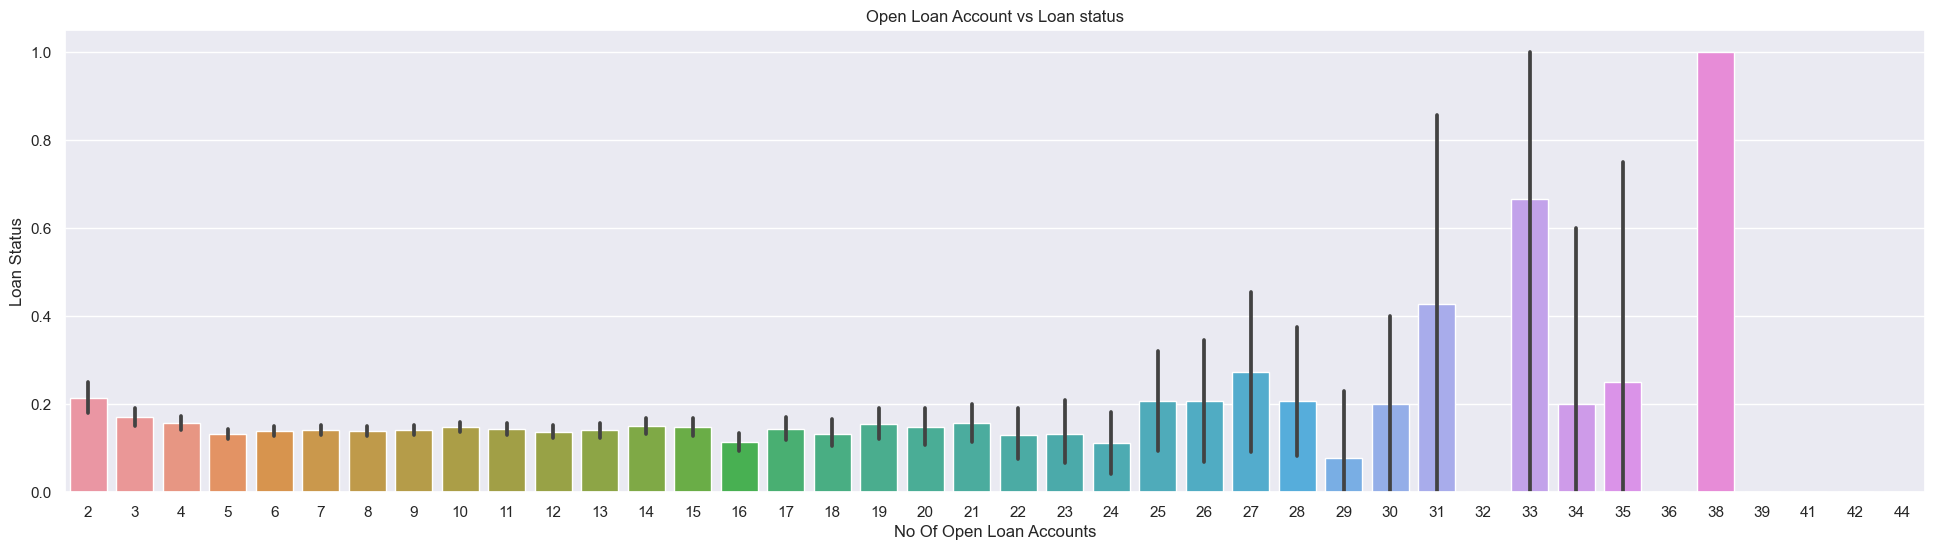

In [95]:
##lets check the graph again between open_acc and loan_status
##open_acc : Compare open_acc vs loan_status to get the defaulters
plt.figure(figsize=(24, 6))
sns.set(style="darkgrid")
sns.barplot(x=df["open_acc"],y=df["loan_status"])
plt.title('Open Loan Account vs Loan status')
plt.xlabel('No Of Open Loan Accounts')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion : looks like people with more open credits defaults more

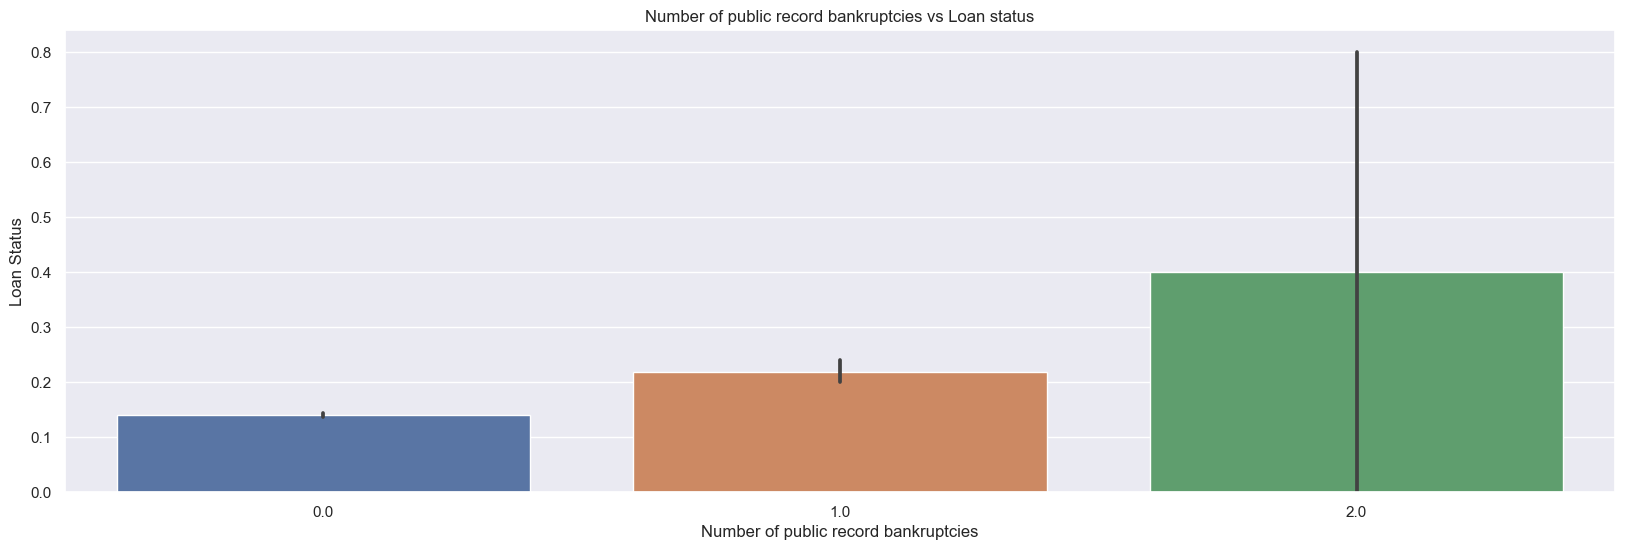

In [96]:
##lets check the graph again between pub_rec_bankruptcies and loan_status
##pub_rec_bankruptcies : Compare pub_rec_bankruptcies vs loan_status to get the defaulters
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
sns.barplot(x=df["pub_rec_bankruptcies"],y=df["loan_status"])
plt.title('Number of public record bankruptcies vs Loan status')
plt.xlabel('Number of public record bankruptcies')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion : more Number of public record bankruptcies do more defaults it seems

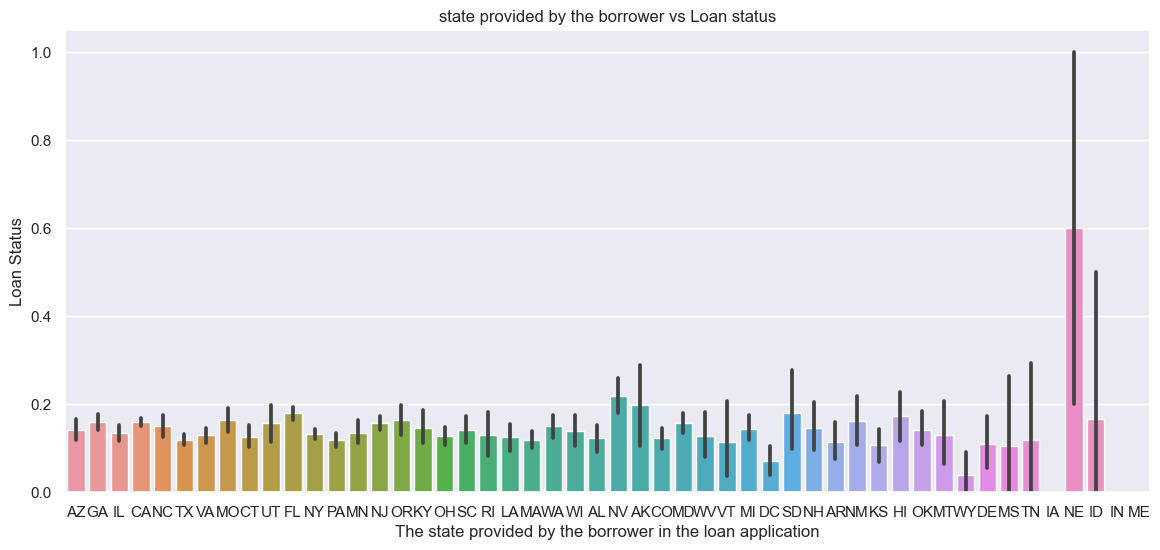

In [97]:
##lets check the graph again between addr_state and loan_status
##addr_state : Compare addr_state vs loan_status to get the defaulters
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.barplot(x=df["addr_state"],y=df["loan_status"])
plt.title('state provided by the borrower vs Loan status')
plt.xlabel('The state provided by the borrower in the loan application')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion : data shows that people from NE state more than other states

# Bivariate Analysis - data varies across continuous variables

In [39]:
##loan_amnt
df['loan_amnt'].median()

10000.0

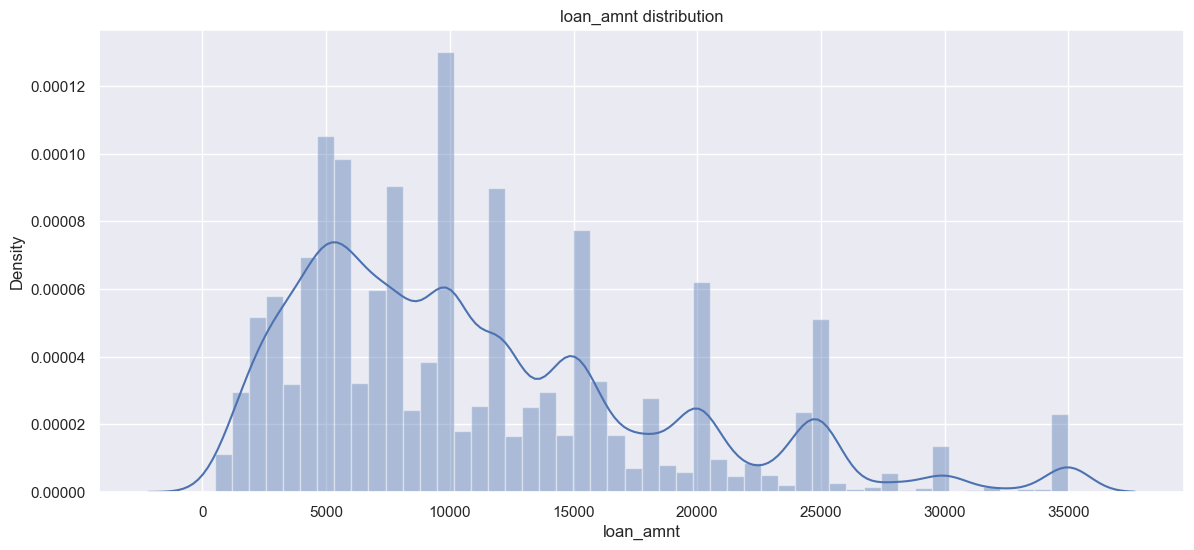

In [98]:
#Let's draw a distplot to get the ranges
plt.figure(figsize=(14, 6))
sns.distplot(df["loan_amnt"])
plt.title('loan_amnt distribution')
plt.show()

In [99]:
## data shows that most of the loan amounts varies from 5000 to 20000, Let's seggregate the continuous columns into different categories
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [100]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

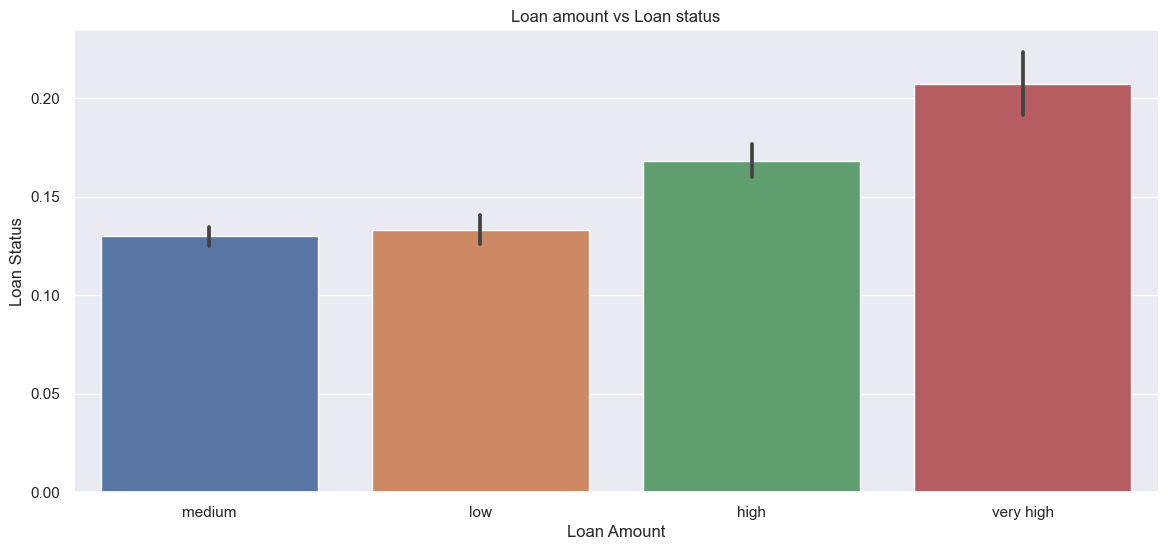

In [101]:
##Lets analysise the graph between loan_amnt and loan_status
##loan_amnt : Compare loan_amnt vs loan_status to get the defaulters
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.barplot(x=df["loan_amnt"],y=df["loan_status"])
plt.title('Loan amount vs Loan status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion : Looks like people who took high amount of loan or more than 25000 defaults more

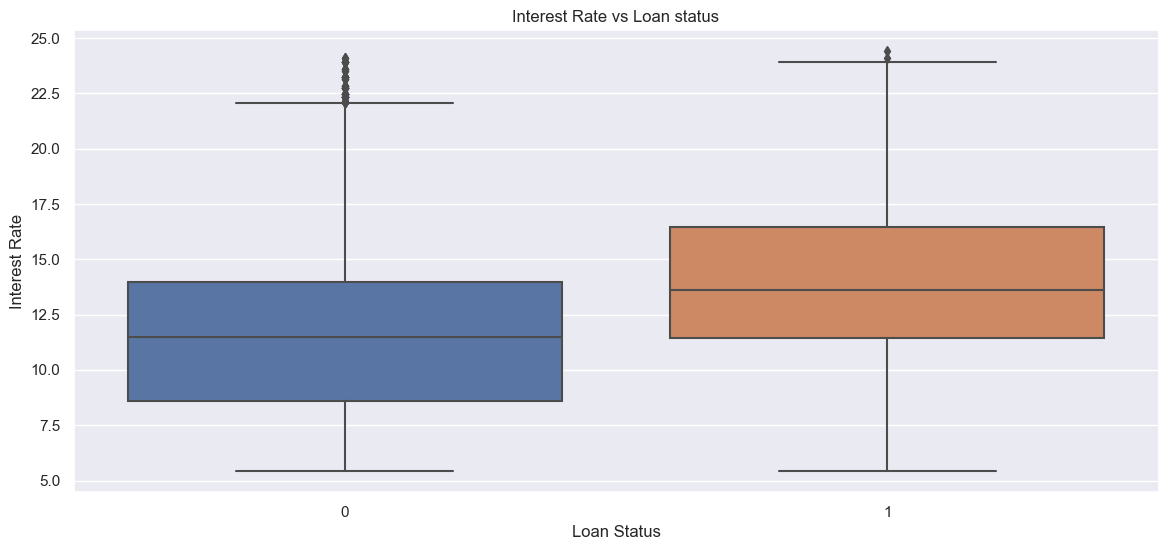

In [102]:
##Lets analysise the graph between int_rate and loan_status
##loan_amnt : Compare loan_amnt vs loan_status to get the defaulters
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.boxplot(y=df["int_rate"],x=df["loan_status"])
plt.title('Interest Rate vs Loan status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()
##Risk Analysis Conclusion : Looks like people with high interest rate defaults more

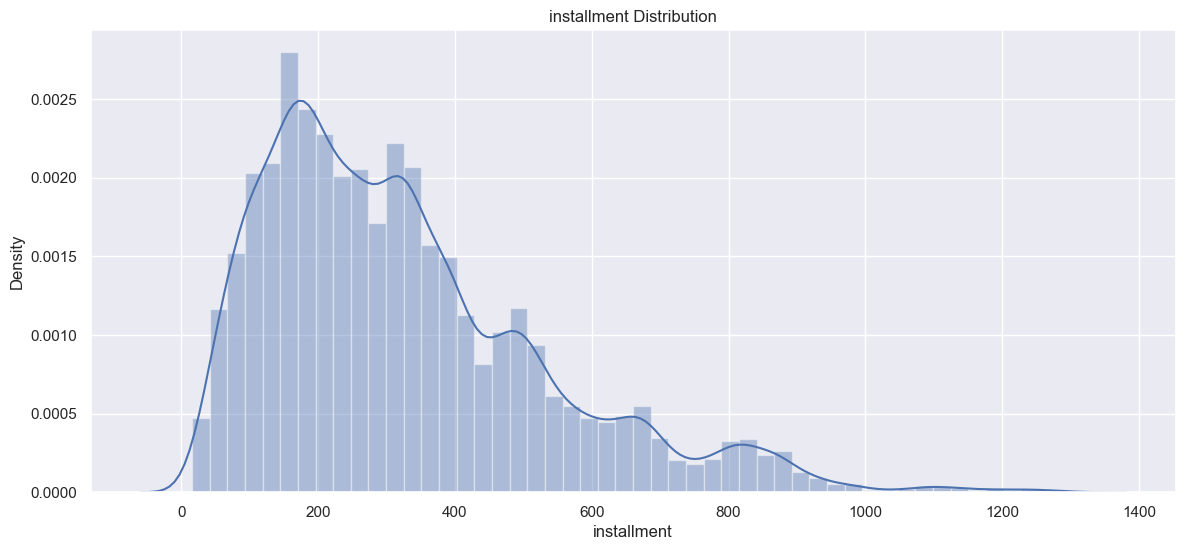

In [103]:
#Let's draw a distplot to get the ranges of Interest Rate
plt.figure(figsize=(14, 6))
sns.distplot(df["installment"])
plt.title('installment Distribution')
plt.show()

In [104]:
#looks like the installment varies between somewhere between 150-600 for most of the users
df['installment'].median()

280.0

In [105]:
##Let's binning the installement into low medium and high
def installment(n):
    if n < 200:
        return 'low'
    elif n >=200 and n < 400:
        return 'medium'
    else:
        return 'high'
        
df['installment'] = df['installment'].apply(lambda x: installment(x))

In [106]:
df['installment'].value_counts()

medium    14390
low       12544
high      10610
Name: installment, dtype: int64

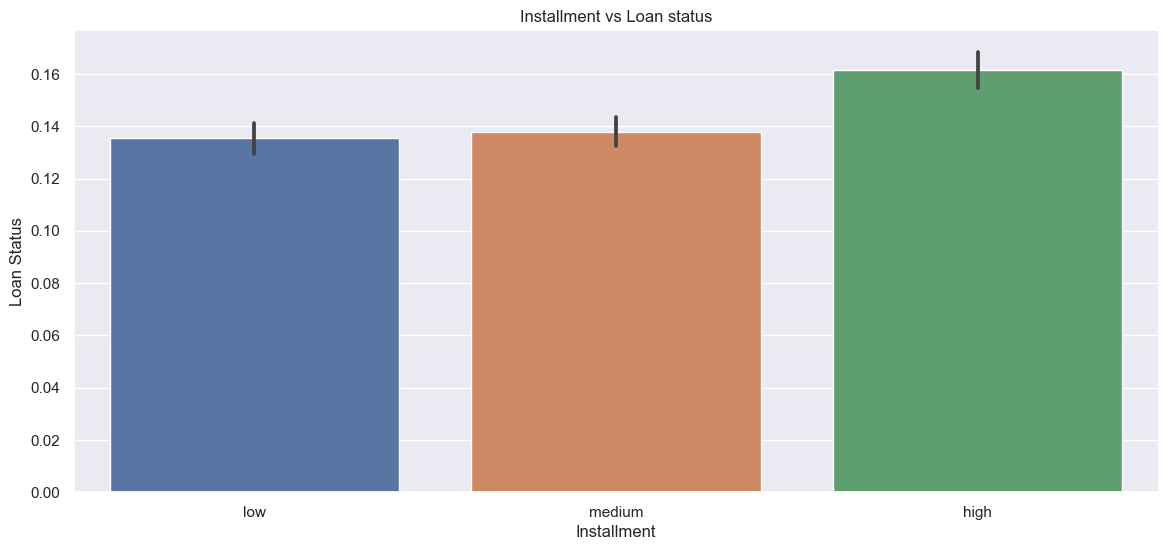

In [107]:
##Lets analysise the graph between installment and loan_status
##installment : Compare installment vs loan_status to get the defaulters
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.barplot(x=df["installment"],y=df["loan_status"])
plt.title('Installment vs Loan status')
plt.xlabel('Installment')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion : Looks like people with high installments defaults more

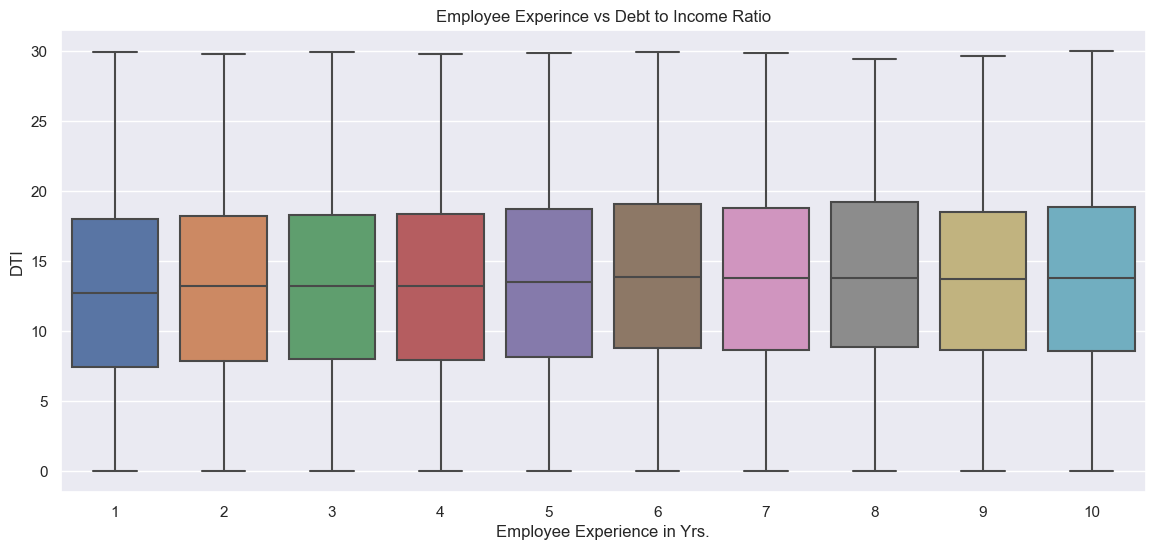

In [51]:
##Lets analysise the graph between emp_length and dti (debt to income ratio)
##DTI and Employee Length : Compare employee length vs dti to get information
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.boxplot(x=df["emp_length"],y=df["dti"])
plt.title('Employee Experince vs Debt to Income Ratio')
plt.xlabel('Employee Experience in Yrs.')
plt.ylabel('DTI')
plt.show()
##Risk Analysis Conclusion : Data shows that more with more experience tend to take more loans 
##and their dti on bit higher side but for others no significant difference.

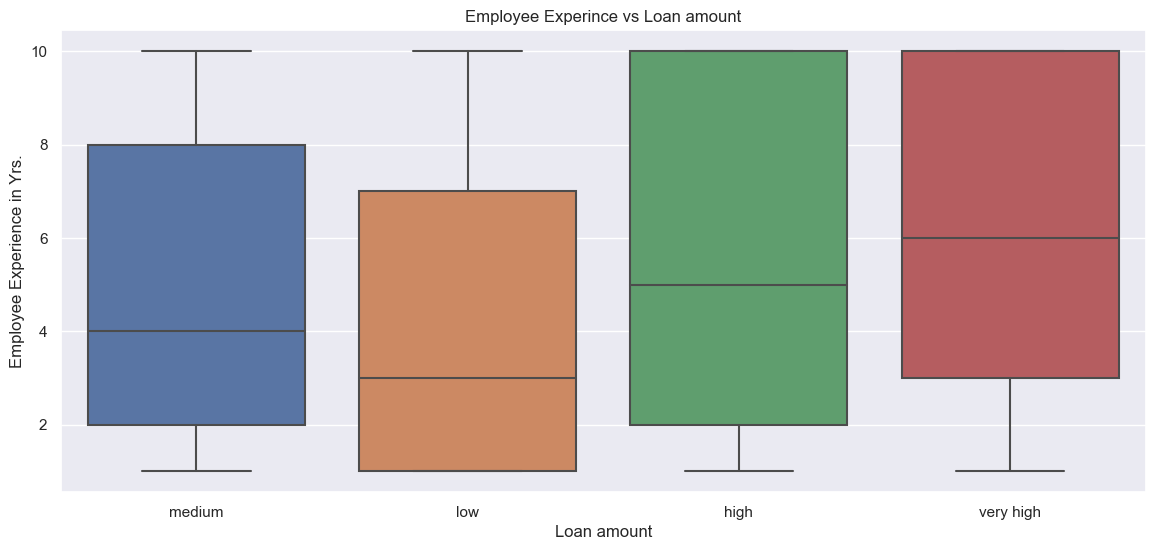

In [108]:
##Lets analysise the graph between emp_length and loan amount
##emp_length and loan_amnt : Compare employee length vs loan amount to get variation on both data
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.boxplot(y=df["emp_length"],x=df["loan_amnt"])
plt.title('Employee Experince vs Loan amount')
plt.xlabel('Loan amount')
plt.ylabel('Employee Experience in Yrs.')
plt.show()
##Risk Analysis Conclusion : Data shows that more with more experience tend to take higher amount of loans

In [53]:
#one more column can be evaluated to get the potential defaulters i.e. issue_d
# first lets convert the string into datetime and then extract loan issue year and month from it
#%b-%y - as we have only month and year in given data
from datetime import datetime
df['issue_date'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [54]:
df['issue_date'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_date, dtype: datetime64[ns]

In [55]:
# now from datetime attribute, extract loan issue year and loan issue month
df['loan_issue_year'] = df['issue_date'].apply(lambda x: x.year)
df['loan_issue_month'] = df['issue_date'].apply(lambda x: x.month)

In [56]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,open_acc,revol_bal,total_acc,total_pymnt,pub_rec_bankruptcies,issue_date,loan_issue_year,loan_issue_month
0,medium,5000,4975.0,36 months,10.65,low,B,B2,10,RENT,...,AZ,27.65,3,13648,9,5863.155187,0.0,2011-12-01,2011,12
1,low,2500,2500.0,60 months,15.27,low,C,C4,1,RENT,...,GA,1.00,3,1687,4,1008.710000,0.0,2011-12-01,2011,12
2,low,2400,2400.0,36 months,15.96,low,C,C5,10,RENT,...,IL,8.72,2,2956,10,3005.666844,0.0,2011-12-01,2011,12
3,medium,10000,10000.0,36 months,13.49,medium,C,C1,10,RENT,...,CA,20.00,10,5598,37,12231.890000,0.0,2011-12-01,2011,12
5,medium,5000,5000.0,36 months,7.90,low,A,A4,3,RENT,...,AZ,11.20,9,7963,12,5632.210000,0.0,2011-12-01,2011,12


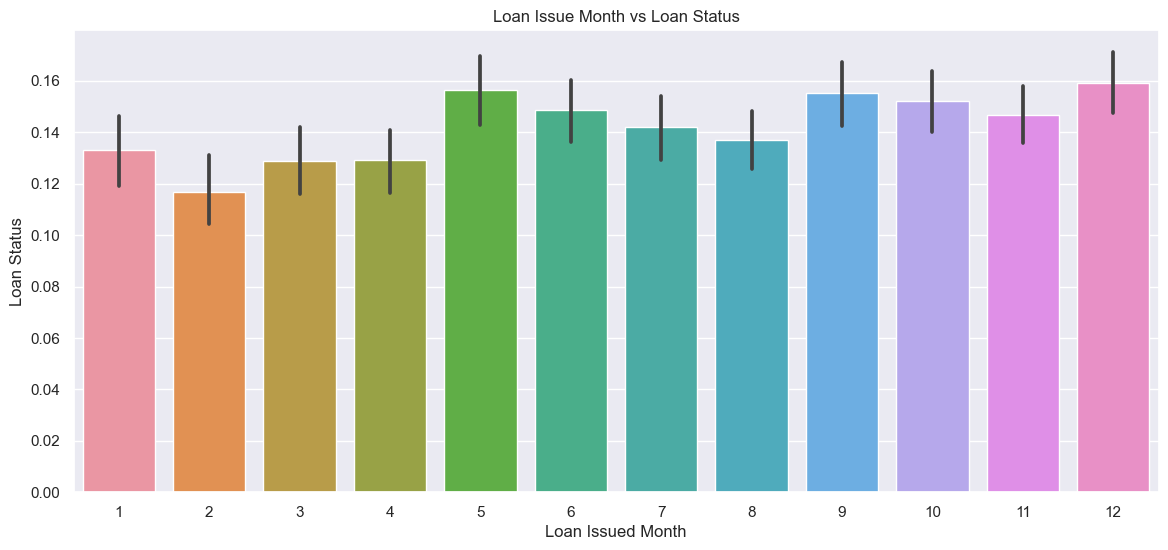

In [57]:
##Lets analysise the graph between loan issue month and loan status
##loan_issue_month : Compare the loan_issue_month and loan_status to see any potential probablity of defaulters
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.barplot(x=df["loan_issue_month"],y=df["loan_status"])
plt.title('Loan Issue Month vs Loan Status')
plt.xlabel('Loan Issued Month')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion : data doesn't show much variants so such impact of loan issue month it seems

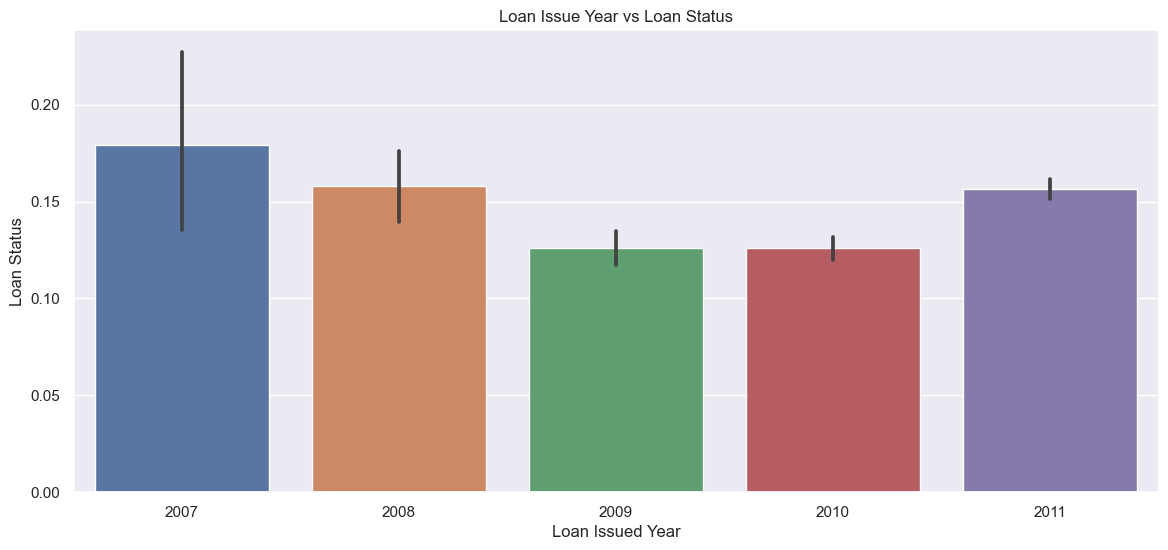

In [58]:
##Lets analysise the graph between loan issue year and loan status
##loan_issue_month : Compare the loan_issue_year and loan_status to see any potential probablity of defaulters
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")
sns.barplot(x=df["loan_issue_year"],y=df["loan_status"])
plt.title('Loan Issue Year vs Loan Status')
plt.xlabel('Loan Issued Year')
plt.ylabel('Loan Status')
plt.show()
##Risk Analysis Conclusion : Data shows that there are more defaulters for the loans issued in the 
#year of 2007 followed by 2008 & 2011

                      funded_amnt  funded_amnt_inv  int_rate  emp_length  \
funded_amnt              1.000000         0.955300  0.302955    0.147930   
funded_amnt_inv          0.955300         1.000000  0.295697    0.158852   
int_rate                 0.302955         0.295697  1.000000   -0.000602   
emp_length               0.147930         0.158852 -0.000602    1.000000   
annual_inc               0.261959         0.249320  0.046092    0.111107   
loan_status              0.059535         0.040097  0.213497    0.016656   
dti                      0.061251         0.070007  0.112188    0.048619   
open_acc                 0.172546         0.159554  0.007594    0.096527   
revol_bal                0.306119         0.285718  0.095136    0.152202   
total_acc                0.249803         0.241953 -0.045310    0.208555   
total_pymnt              0.898430         0.873913  0.289022    0.131086   
pub_rec_bankruptcies    -0.032708        -0.037598  0.082988    0.063212   
loan_issue_y

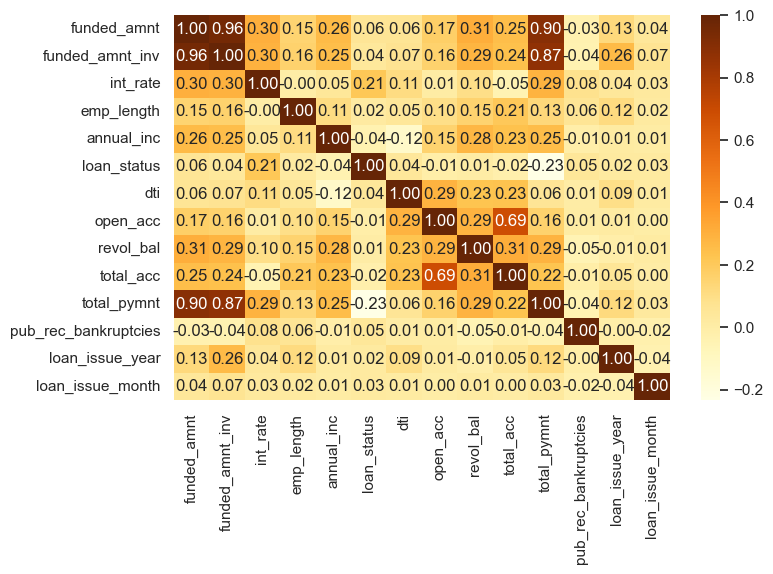

In [59]:
##Checking the each numrical attribute correlation with other attributes
plt.figure(figsize=(8,5))
c = df.corr()
print(c)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()
##Correlation Analysis:
# Observation is that Loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# positive correlation between annual income and employment years mean more experience tend to more annual income.